정형데이터 실습

1. 회귀모형
    * 선형 회귀모형

2. 분류모형
    * K-nearest neighborhood
    * 의사결정나무
---

1. 선형 회귀모형

In [19]:
# !pip install scikit-learn
# !pip install matplotlib

In [4]:
# scikit-learn을 설치합니다 (설치되어 있지 않은 경우)
# !pip install scikit-learn

import numpy as np
from sklearn.linear_model import LinearRegression

# 예제 데이터 생성
# 아래는 간단한 예제 데이터로 설명하기 위한 것이며, 실제 데이터를 사용하려면 데이터를 불러오세요.
X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)  # 입력 변수 (독립 변수)
y = np.array([2, 4, 5, 4, 5])  # 타겟 변수 (종속 변수)

# 선형 회귀 모델 생성
model = LinearRegression()

# 모델 훈련 (데이터에 적합)
model.fit(X, y)

# 훈련된 모델을 사용하여 예측
# 예측을 위한 새로운 데이터 (예: X_new)를 입력하여 y_pred 값을 얻을 수 있습니다.
# y_pred = model.predict(X_new)


LinearRegression()

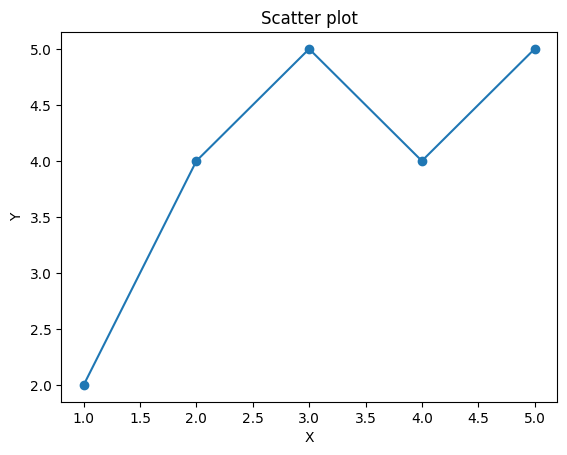

In [2]:
# 필요한 라이브러리를 불러옵니다 (설치되어 있지 않은 경우 먼저 설치해야 합니다).
# !pip install matplotlib

import matplotlib.pyplot as plt

# 그래프 그리기
plt.plot(X, y)

# x축과 y축 레이블 추가
plt.xlabel('X')
plt.ylabel('Y')

# 그래프 제목 추가
plt.title('Scatter plot')

# point 추가
plt.scatter(X, y) # 데이터 포인트 그리기

# 그래프 표시
plt.show()

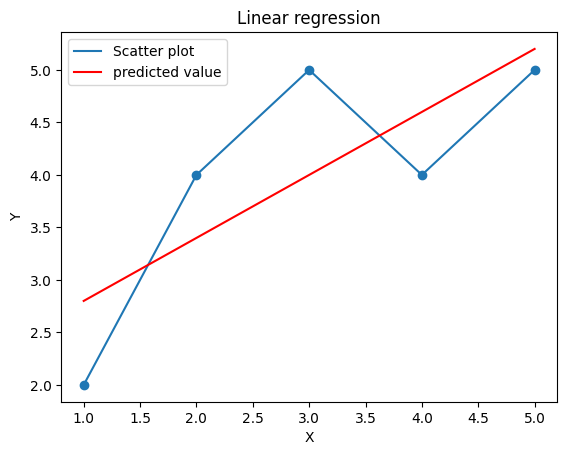

In [3]:
# 그래프 그리기
plt.plot(X, y, label='Scatter plot')  # 데이터 포인트 그리기
plt.scatter(X, y)
plt.plot(X, model.predict(X), color='red', label='predicted value')  # 선형 회귀 예측 그래프 그리기 (빨간색)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear regression')
plt.legend()
plt.show()

2. KNN

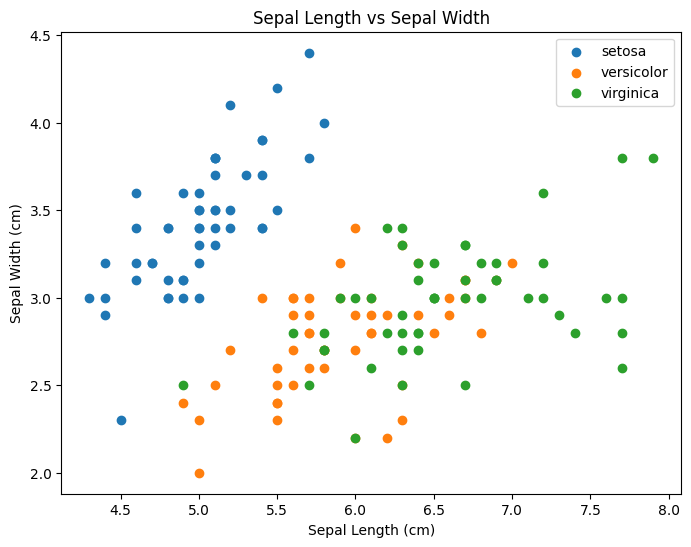

In [12]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt  # matplotlib 모듈을 import

iris = load_iris()
# prepare data
X = iris.data[:, :2]
y = iris.target

# 데이터 그룹별로 나누기
classes = list(set(y))  # 고유한 클래스 값 추출

plt.figure(figsize=(8, 6))

for cls in classes:
    indices = y == cls  # 현재 클래스에 해당하는 인덱스 선택
    plt.scatter(X[indices, 0], X[indices, 1], label=iris.target_names[cls])

plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Sepal Length vs Sepal Width')
plt.legend()
plt.show()


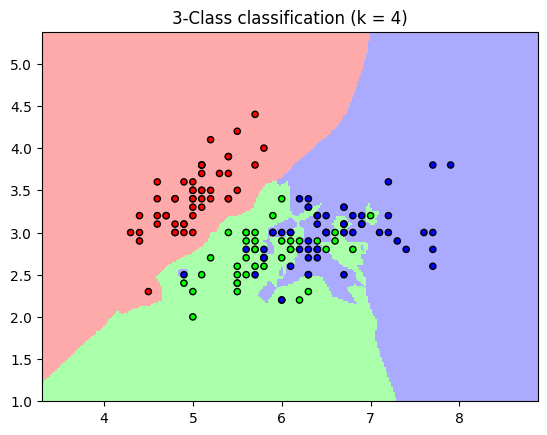

In [21]:
from sklearn import neighbors, datasets
from matplotlib.colors import ListedColormap

n_neighbors = 4

# we create an instance of Neighbours Classifier and fit the data.
clf = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
clf.fit(X, y)

# Define a colormap for the plot
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])

# Define a colormap for the training points
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# Calculate min, max, and limits
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

# Predict class using data and kNN classifier
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("3-Class classification (k = %i)" % (n_neighbors))
plt.show()

3. 의사결정나무

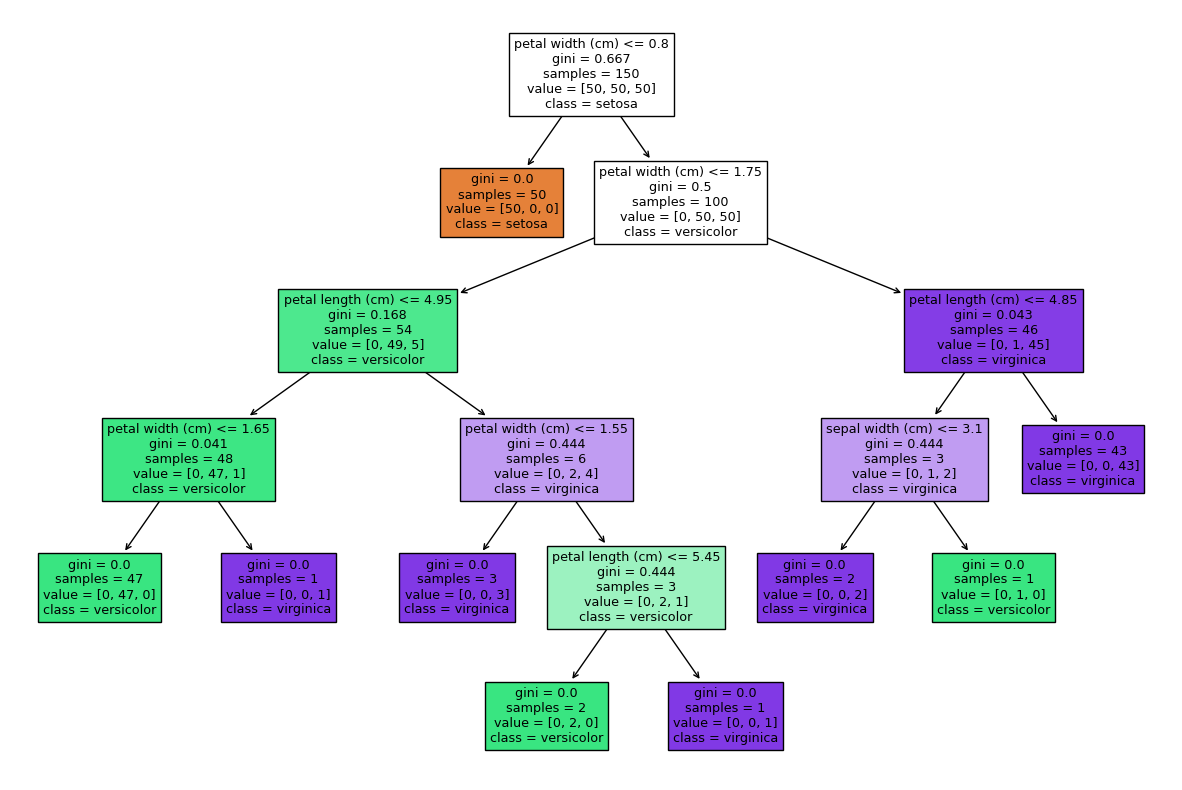

In [22]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Create a DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)

# Fit the model to the data
clf.fit(X, y)

# Plot the decision tree
plt.figure(figsize=(15, 10))
plot_tree(clf, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)
plt.show()
